# Core Analysis
- Conventional core allow geologist to physically describe reservoir rocks at the very high resolutions as opposed to more commonly available wireline logs and seismic data.
- Cores allow for lithologic, natural fracture and facies description
- Laboratory measurements of reservoir quality (porosity & permeability), grain-density and oil saturation can also be obtained from core
- **This Jupyter Notebook deals with the more common evaluations of dealing with reservoir quality, calibrations of porosity & permeability to wireline log data, and calculation of permeability height (Kh) used in the determination of productivity index (STB/day /psi)**

## Import Python Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import random
import math
import lasio

## Import Data from Github
1. Core GR (Core Gamma Ray measurements need to depth align cores to wireline data)
2. Plug Data (Porosity & Permeability from core measurements)
3. DPHZ (Density Porosity from wireline logs)
4. Formation Tops


In [2]:
import requests
import io
from io import BytesIO

url = "https://raw.githubusercontent.com/dmadvoc/Petroleum-Geology-Analyses/main/sE6 Core Analysis 48-X-28.xlsx"
download = requests.get(url).content
gr   = pd.read_excel(BytesIO(download), sheet_name='Core GR')
kphi = pd.read_excel(BytesIO(download), sheet_name='Plug Data')
dphi = pd.read_excel(BytesIO(download), sheet_name='DPHZ')
tops = pd.read_excel(BytesIO(download), sheet_name='Tops')

### Import data from local drive (optional)

In [3]:
# Import Data from Local Drive
# Read las files from local drive

# # Read in core porosity data 
# gr = pd.read_excel ('/Users/davidadvocate/Documents/Python/Data/sE6 Core Analysis 48-X-28.xlsx',
#                     sheet_name='Core GR')

# phik = pd.read_excel ('/Users/davidadvocate/Documents/Python/Data/sE6 Core Analysis 48-X-28.xlsx',
#                     sheet_name='Plug Data')

# dphi = pd.read_excel ('/Users/davidadvocate/Documents/Python/Data/sE6 Core Analysis 48-X-28.xlsx',
#                     sheet_name='DPHZ')
                      
# tops = pd.read_excel ('/Users/davidadvocate/Documents/Python/Data/sE6 Core Analysis 48-X-28.xlsx',
#                     sheet_name='Tops')

## Examine Core Gamma Ray and Cored Intervals
- Display core gamma ray log with tops of core intervals annotated
- Use groupby to prepare a dataframe of cores with top and base and feet recovered
- Report the number of cores and the feet of core recovered

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4121 entries, 0 to 4120
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Depth_FT_Driller  4121 non-null   float64
 1   Depth_FT          4121 non-null   float64
 2   GR_API            4121 non-null   float64
 3   Core_ID           4121 non-null   float64
dtypes: float64(4)
memory usage: 128.9 KB


,Core_ID,Top,Base,Recovered
0,1.0,5306.000000,5340.990456,35.0
1,2.0,5340.003181,5375.922587,35.9
2,3.0,5382.000000,5417.000000,35.0
3,4.0,5417.000000,5455.923977,38.9
4,5.0,5456.000000,5500.000000,44.0
5,6.0,5503.670455,5508.443182,4.8
6,7.1,5522.106007,5536.946996,14.8
7,7.2,5540.500000,5560.456757,20.0
8,8.0,5560.527027,5575.494595,15.0
9,9.0,5575.564865,5579.500000,3.9


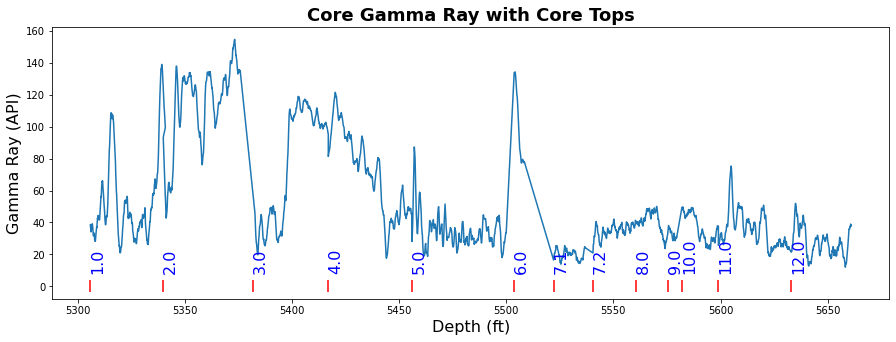

Number of Cores:         13
Feet of Core Recovered:  325.3


In [33]:
# Examine Core Gamma Ray Data
gr.info()
gr.describe()

# Create a DataFrame of Core_ID Top and Base
cores = gr.groupby(['Core_ID']).agg({"Depth_FT": ["min", "max"]}).reset_index()

#cores.rename(columns={'Depth_FT, min': 'Top', 'Depth_FT, max': ' Base'})   # This should work, but doesn't work
cores.columns = ['Core_ID', 'Top', 'Base']                                  # This reanmes column names
cores['Recovered'] = np.round(cores['Base'] - cores['Top'],1)

display(cores)

# Prepare core tops for log annotation
x=cores['Top'].to_list()                  # Depth Positional Parameter
y=(cores['Top']*0+10).to_list()           # Scalor Value
n=cores['Core_ID'].astype(str).to_list()  # Annotation Must be a string


fig, axs = plt.subplots(1,figsize=(15, 5))
plt.plot(gr['Depth_FT'], gr['GR_API'])
plt.scatter(cores['Top'], cores['Top']*0, c='red', marker='|', s=150)

# Formation Tops Annoation 
for i, txt in enumerate(n):
       plt.annotate(txt, (x[i], y[i]), rotation=90, c='b', fontsize=16)
        
plt.title("Core Gamma Ray with Core Tops", fontsize=18, fontweight='bold')
plt.xlabel('Depth (ft)', fontsize=16)
plt.ylabel('Gamma Ray (API)', fontsize=16)

plt.show()

# Show the number of cores
print('Number of Cores:        ', cores['Top'].count())
print('Feet of Core Recovered: ', cores['Recovered'].sum())

## Examine Density Porosity Log Data
- Calculate density porosity as a percent
- Plot density porosity with core plug porosity for comparison
- Note: Not all cores recovered had core analysis done

### Check core porosity to wireline density porosity (DPHZ)

In [49]:
tops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   WLBR_ID     12 non-null     int64  
 1   WLBR_NM     12 non-null     object 
 2   Form Alias  12 non-null     object 
 3   Top MD      12 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 512.0+ bytes


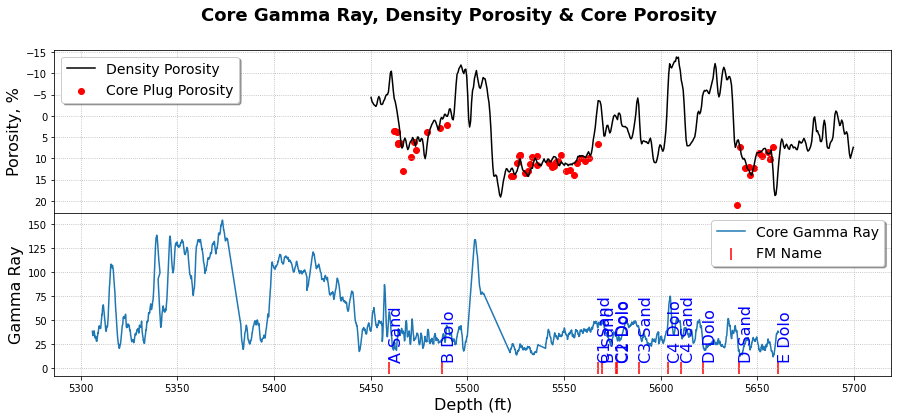

In [52]:
#dphi.info()
dphi['DPHZ_pct'] = dphi['DPHZ']*100     # Calculate Density Porosity as a percent
#display(dphi)

# Prepare formation tops for log annotation
fx=tops['Top MD'].to_list()                  # Depth Positional Parameter
fy=(tops['Top MD']*0+10).to_list()           # Scalor Value
fn=tops['Form Alias'].to_list()              # Annotation Must be a string

fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(15, 6), gridspec_kw={'hspace': 0}) 
ax1.plot(dphi['Depth_FT'], dphi['DPHZ_pct'], c='k', label= 'Density Porosity')
ax1.scatter(kphi['Depth_FT'], kphi['Porosity'], c='red', label ='Core Plug Porosity')
ax2.plot(gr['Depth_FT'], gr['GR_API'], label='Core Gamma Ray')
ax2.scatter(tops['Top MD'], tops['Top MD']*0, c='red', marker='|', s=150, label='FM Name')

# Formation Tops Annoation 
for i, txt in enumerate(fn):
       plt.annotate(txt, (fx[i], fy[i]), rotation=90, c='b', fontsize=16)
        
fig.suptitle("Core Gamma Ray, Density Porosity & Core Porosity", fontsize=18, fontweight='bold')
ax1.set_ylabel('Porosity, %', fontsize=16)
ax2.set_xlabel('Depth (ft)', fontsize=16)
ax2.set_ylabel('Gamma Ray', fontsize=16)

ax1.invert_yaxis()         # Inverts the axis direction

ax1.grid(True, linestyle = ':')
ax2.grid(True, linestyle = ':')

ax1.legend(shadow=True, fontsize=14)
ax2.legend(shadow=True, fontsize=14)

plt.show()

### Look at statistical measures of core porosity and permeability

#### Box and Whisker plots and descriptive statistics

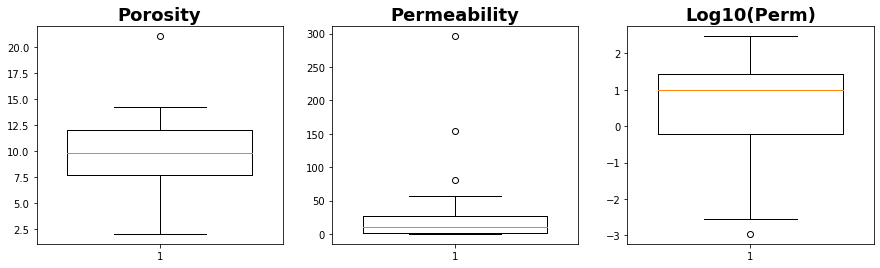

Depth_FT is the core aligned depths

Statistical Measures:
       Depth_FT_Driller     Depth_FT   Porosity          Ka   Ka_log10
count         51.000000    51.000000  51.000000   51.000000  51.000000
mean        5540.994118  5549.131373   9.779775   24.111337   0.517311
std           64.521393    64.528882   3.538400   46.760976   1.363176
min         5454.200000  5462.200000   2.072123    0.001100  -2.958607
25%         5498.050000  5506.050000   7.740626    0.706500  -0.213460
50%         5533.800000  5542.300000   9.867277    9.780000   0.990339
75%         5556.600000  5565.100000  12.043197   26.400000   1.421404
max         5650.300000  5658.300000  21.069782  296.000000   2.471292


In [39]:
# Core plug measurents are porosity (phi in %) and permeability to air (Ka in mD) refered to as kphi
kphi['Ka_log10']= np.log10(kphi['Ka'])   # Log10(Perm) is used because Perm. usually spans multiple orders of magnitude

# kphi.info()

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15, 4))
ax1.boxplot(kphi['Porosity'], widths=.75) # patch_artist=True
ax2.boxplot(kphi['Ka'], widths=.75) # patch_artist=True
ax3.boxplot(kphi['Ka_log10'], widths=.75) # patch_artist=True

ax1.set_title('Porosity', fontsize=18, fontweight='bold')
ax2.set_title('Permeability', fontsize=18, fontweight='bold')
ax3.set_title('Log10(Perm)', fontsize=18, fontweight='bold')
plt.show()

print('Depth_FT is the core aligned depths' '\n')
print('Statistical Measures:')
print(kphi.describe())



#### Histograms

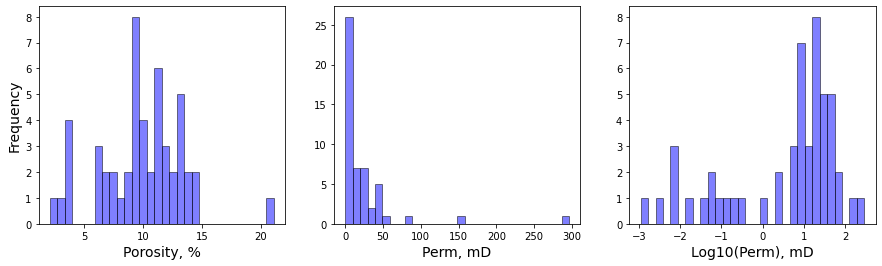

In [7]:
# Look at historgams
kphi['Ka_log10']= np.log10(kphi['Ka'])
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15, 4))
ax1.hist(kphi['Porosity'], bins=30, color='blue', edgecolor='k', alpha=.5)
ax2.hist(kphi['Ka'], bins=30, color='blue', edgecolor='k', alpha=.5)
ax3.hist(kphi['Ka_log10'], bins=30, color='blue', edgecolor='k', alpha=.5)

ax1.set_xlabel('Porosity, %' , fontsize=14)
ax2.set_xlabel('Perm, mD' , fontsize=14)
ax3.set_xlabel('Log10(Perm), mD' , fontsize=14)
ax1.set_ylabel('Frequency', fontsize=14)
plt.show()

## Calibrate Core Permeability to Density (Regression Analysis)

### Plot core permeability with wireline log data

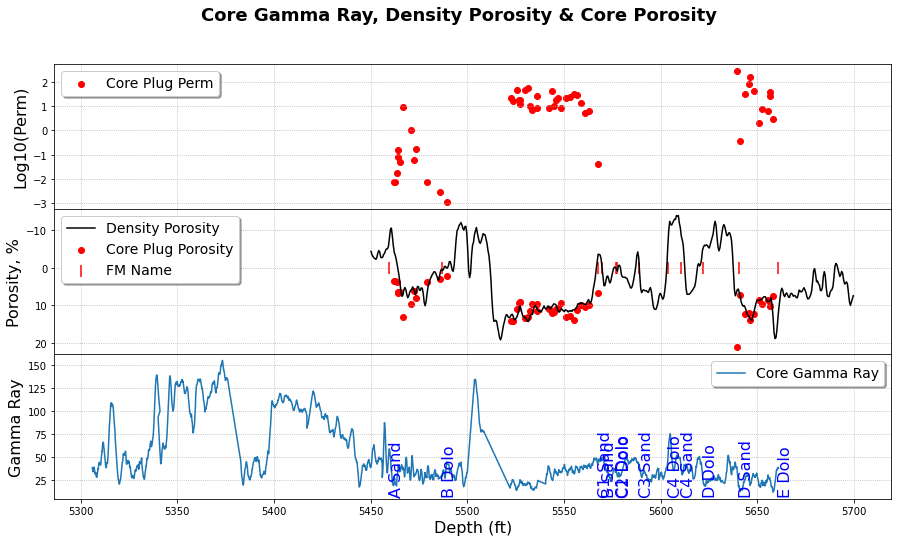

In [53]:
# Plot Permibility on a Log Plot
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, figsize=(15, 8), gridspec_kw={'hspace': 0}) 
ax1.scatter(kphi['Depth_FT'], kphi['Ka_log10'], c='red', label='Core Plug Perm')
ax2.plot(dphi['Depth_FT'], dphi['DPHZ_pct'], c='k', label= 'Density Porosity')
ax2.scatter(kphi['Depth_FT'], kphi['Porosity'], c='red', label ='Core Plug Porosity')
ax3.plot(gr['Depth_FT'], gr['GR_API'], label='Core Gamma Ray')
ax2.scatter(tops['Top MD'], tops['Top MD']*0, c='red', marker='|', s=150, label='FM Name')

# Formation Tops Annoation 
for i, txt in enumerate(fn):
       plt.annotate(txt, (fx[i], fy[i]), rotation=90, c='b', fontsize=16)
        
fig.suptitle("Core Gamma Ray, Density Porosity & Core Porosity", fontsize=18, fontweight='bold')
ax1.set_ylabel('Log10(Perm)', fontsize=16)
ax2.set_ylabel('Porosity, %', fontsize=16)
ax3.set_xlabel('Depth (ft)', fontsize=16)
ax3.set_ylabel('Gamma Ray', fontsize=16)


ax2.invert_yaxis()         # Inverts the axis direction

ax1.grid(True, linestyle = ':')
ax2.grid(True, linestyle = ':')
ax3.grid(True, linestyle = ':')

ax1.legend(shadow=True, fontsize=14)
ax2.legend(shadow=True, fontsize=14)
ax3.legend(shadow=True, fontsize=14)

plt.show()

### Examine Porosity - Permeability scatter plots
1. Linear-Linear
2. Simi-log (aka, Log-Linear)
3. Log-Log

-Note the heteroscedasticity, i.e., variance of permeability increases with increasing porosity
-The simi-log relationship is curvalinear and can be fit with a polynomial but that would be unreliable 
 beyond the range of the data
-The log-log relationship show a fairly good linear relationship


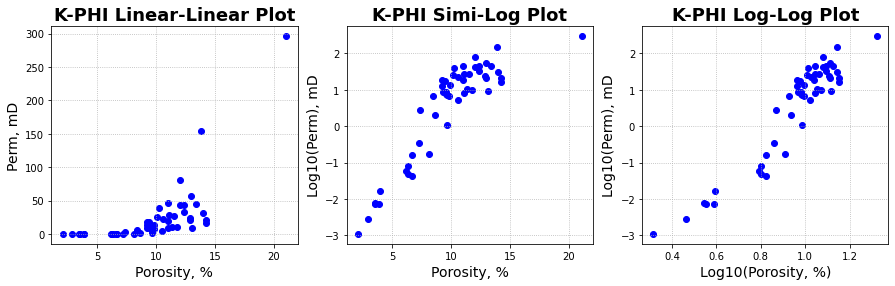

In [41]:
# Examine the Porosity Permiability Scatter Plot for simi-log and log-log relationships
xvar=np.array(kphi['Porosity'])
yvar=np.array(kphi['Ka'])
xvar_log10=np.array(np.log10((kphi['Porosity'])))
yvar_log10=np.array(kphi['Ka_log10'])

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15, 4))
ax1.scatter(xvar, yvar, c='b')
ax2.scatter(xvar, yvar_log10, c='b')
ax3.scatter(xvar_log10, yvar_log10, c='b')

ax1.set_title('K-PHI Linear-Linear Plot', fontsize=18, fontweight='bold')
ax2.set_title('K-PHI Simi-Log Plot', fontsize=18, fontweight='bold')
ax3.set_title('K-PHI Log-Log Plot', fontsize=18, fontweight='bold')

ax1.set_xlabel('Porosity, %', fontsize=14)
ax2.set_xlabel('Porosity, %', fontsize=14)
ax3.set_xlabel('Log10(Porosity, %)', fontsize=14)

ax1.set_ylabel('Perm, mD', fontsize=14)
ax2.set_ylabel('Log10(Perm), mD', fontsize=14)
ax3.set_ylabel('Log10(Perm), mD', fontsize=14)

ax1.grid(True, linestyle = ':')
ax2.grid(True, linestyle = ':')
ax3.grid(True, linestyle = ':')

print('-Note the heteroscedasticity, i.e., variance of permeability increases with increasing porosity')
print('-The simi-log relationship is curvalinear and can be fit with a polynomial but that would be unreliable', '\n', 
      'beyond the range of the data')
print('-The log-log relationship show a fairly good linear relationship')

plt.show()

### Fit a Polynomial Trend to the Simi-Log Plot and a linear Trend to the Log-Log Plot

### Fit a polynomial Trend to the Simi-Log Plot of Core Data
- Works well within the range of the data, but can extrapolate wildly away from data
- A good references is: https://joshualoong.com/2018/10/03/Fitting-Polynomial-Regressions-in-Python/

In [10]:
# Fit a second order polynomial to the simi-log k-phi plot

import statsmodels.formula.api as smf

x = kphi['Porosity'].values
y = np.log10(kphi['Ka'].values)

# The dataframe is needed for the ols results script below
df1 = pd.DataFrame(columns=['y', 'x'])
df1['x'] = x
df1['y'] = y

# Generalize formula for a 3rd order polynomial
# y = Bo + B1x - B2x^2 + B3x^3 + Coeff

degree = 2

weights = np.polyfit(x, y, degree)
model = np.poly1d(weights)
results = smf.ols(formula='y ~ model(x)', data=df1).fit() #Note: the model can be rewritten to add additional variables
print('Model: ')
print(model)

# Note the model above can be rewritten to include muliple independent variables
# model = smf.ols(formula='y ~ x1 + x2 + x3', data=df)

#x_line = np.linspace(np.min(x),np.max(x), num=30)
x_line = np.linspace(0, 30, num=30)
y_line=-0.0203*x_line**2 + 0.7458*x_line - 4.586

display(results.summary())

Model: 
         2
-0.0203 x + 0.7458 x - 4.586


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     458.2
Date:                Fri, 13 May 2022   Prob (F-statistic):           1.62e-26
Time:                        19:26:06   Log-Likelihood:                -28.065
No. Observations:                  51   AIC:                             60.13
Df Residuals:                      49   BIC:                             63.99
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.478e-15      0.065   2.29e-14      1.000      -0.130       0.130
model(x)       1.0000      0.047     21.406      0.000       0.906       1.094
==============================================================================
Omnibus:                        2.864   Durbin-Watson:                   1.072
Prob(Omnibus):                  0.239   Jarque-Bera (JB):                2.094
Skew:                          -0.325   Prob(JB):                        0.351
Kurtosis:                       2.250   Cond. No.                         1.67
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###  Fit a Linear Trend to the Log-Log Plot of Core Data
- good reference: https://github.com/areed1192/sigma_coding_youtube/blob/master/python/python-data-science/machine-learning/simple-linear-regression/Linear%20Regression%2

In [11]:
# Fit a linear model to the log-log k-phi relationship

import statsmodels.api as sm

xvar2 = sm.add_constant(xvar_log10) # Used to Define the intercept
model = sm.OLS(yvar_log10,xvar2)    # Create OLS model. xvar2 is the model coefficient
est = model.fit()                   # Fit the data
print(est.summary())                # Summarize the model

# est.resid.hist()                  # Examine histogram of residuals



#print(est.params)                  # Prints the Model Intercept and Slope
est_b,est_m = est.params            # Extracts the Model Intercepth and Slope for plotting

x_line2 = np.linspace(.3, 1.3, num=30)
y_line2=6.4997*x_line2-5.6823


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     381.8
Date:                Fri, 13 May 2022   Prob (F-statistic):           8.90e-25
Time:                        19:26:07   Log-Likelihood:                -32.228
No. Observations:                  51   AIC:                             68.46
Df Residuals:                      49   BIC:                             72.32
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.6823      0.324    -17.545      0.0

### Plot the Simi-Log and Log-Log Porosity ~ Permeability models side by side


The simi-log Polynomial model is a better fit within the limits of the data
The linear log-log model is more reliable beyond the limits of the data


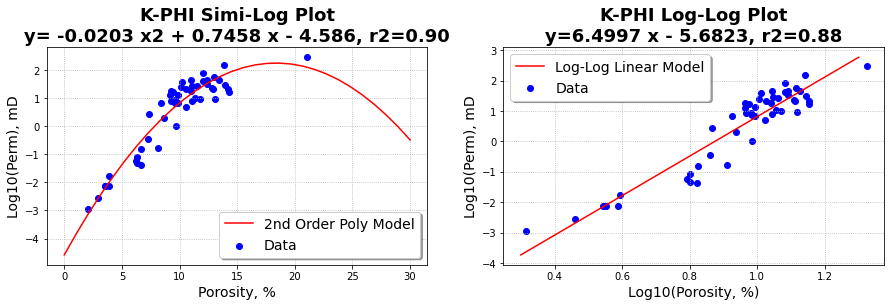

In [12]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 4))

ax1.scatter(xvar, yvar_log10, c='b', label='Data')
ax2.scatter(xvar_log10, yvar_log10, c='b', label='Data')

ax1.plot(x_line, y_line, c='r', label='2nd Order Poly Model')
ax2.plot(x_line2, y_line2, c='r', label='Log-Log Linear Model')

ax1.set_title('K-PHI Simi-Log Plot' '\n' 'y= -0.0203 x2 + 0.7458 x - 4.586, r2=0.90', fontsize=18, fontweight='bold')
ax2.set_title('K-PHI Log-Log Plot' '\n' 'y=6.4997 x - 5.6823, r2=0.88', fontsize=18, fontweight='bold')

ax1.set_xlabel('Porosity, %', fontsize=14)
ax2.set_xlabel('Log10(Porosity, %)', fontsize=14)

ax1.set_ylabel('Log10(Perm), mD', fontsize=14)
ax2.set_ylabel('Log10(Perm), mD', fontsize=14)

ax1.legend(shadow=True, fontsize=14)
ax2.legend(shadow=True, fontsize=14)

ax1.grid(True, linestyle = ':')
ax2.grid(True, linestyle = ':')

print('The simi-log Polynomial model is a better fit within the limits of the data')
print('The linear log-log model is more reliable beyond the limits of the data')


## Log Plot comparing measured vs modeled permeability

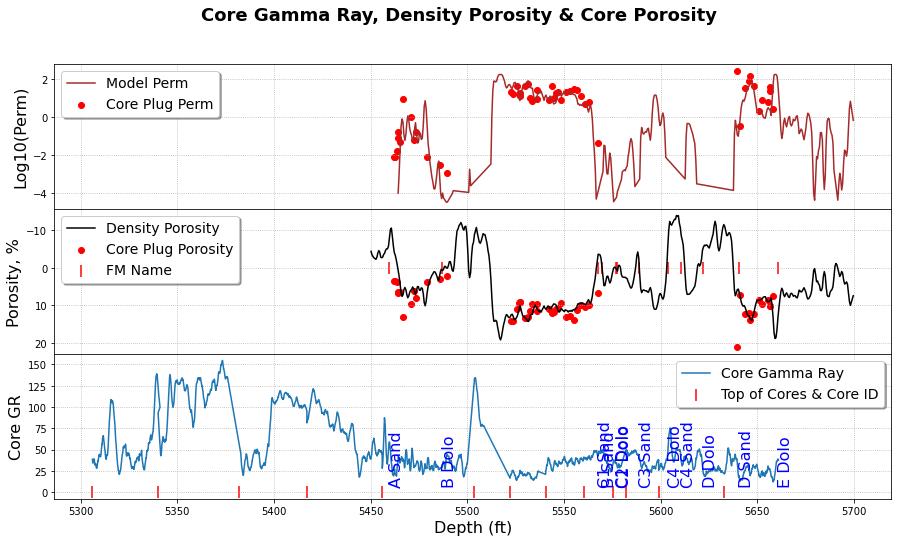

In [54]:
#Model Permeability from Density log using 2nd order polynomial


# Filter Density Porosity > 0 for taking the log10 in a new dataframe
df_filt = dphi.loc[(dphi.DPHZ_pct > 0)].reset_index()

# Calculate the log10 of Density Porosity
df_filt['DPHZ_log10']= np.log10(df_filt['DPHZ_pct'])

# Calculate Model Perm based on 2nd Order Polynomial
df_filt['log_perm'] = (df_filt['DPHZ_pct']**2)*-0.0203 + (df_filt['DPHZ_pct']*0.7458) - 4.586
# display(df_filt)

# Prepare core tops for log annotation
x=cores['Top'].to_list()                  # Depth Positional Parameter
y=(cores['Top']*0+10).to_list()           # Scalor Value
n=cores['Core_ID'].astype(str).to_list()  # Annotation Must be a string

fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, figsize=(15, 8), gridspec_kw={'hspace': 0}) 
ax1.scatter(kphi['Depth_FT'], kphi['Ka_log10'], c='red', label='Core Plug Perm')
ax1.plot(df_filt['Depth_FT'], df_filt['log_perm'], c='brown', label='Model Perm')
ax2.plot(dphi['Depth_FT'], dphi['DPHZ_pct'], c='k', label= 'Density Porosity')
ax2.scatter(kphi['Depth_FT'], kphi['Porosity'], c='red', label ='Core Plug Porosity')
ax3.plot(gr['Depth_FT'], gr['GR_API'], label='Core Gamma Ray')
ax3.scatter(cores['Top'], cores['Top']*0, c='red', marker='|', s=150, label='Top of Cores & Core ID')
ax2.scatter(tops['Top MD'], tops['Top MD']*0, c='red', marker='|', s=150, label='FM Name')

# Formation Tops Annoation 
for i, txt in enumerate(fn):
       plt.annotate(txt, (fx[i], fy[i]), rotation=90, c='b', fontsize=16)
        
fig.suptitle("Core Gamma Ray, Density Porosity & Core Porosity", fontsize=18, fontweight='bold')
ax1.set_ylabel('Log10(Perm)', fontsize=16)
ax2.set_ylabel('Porosity, %', fontsize=16)
ax3.set_xlabel('Depth (ft)', fontsize=16)
ax3.set_ylabel('Core GR', fontsize=16)

ax2.invert_yaxis()         # Inverts the axis direction

ax1.grid(True, linestyle = ':')
ax2.grid(True, linestyle = ':')
ax3.grid(True, linestyle = ':')

ax1.legend(shadow=True, fontsize=14)
ax2.legend(shadow=True, fontsize=14)
ax3.legend(shadow=True, fontsize=14)

plt.show()


## Calculate Permeability Height (Kh) - Used in the calculation of Porductivity Index (STB/day/psi)
- Summerize the sum of permeability by the three zones identified in the core data

### Examine Dataframes to be used

In [14]:
# Examine two dataframes to be merged
df_filt.info() # Modeled Permeability data from above
kphi.info()    # Core Analysis data with Zones identified

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       357 non-null    int64  
 1   Depth_FT    357 non-null    float64
 2   DPHZ        357 non-null    float64
 3   DPHZ_pct    357 non-null    float64
 4   DPHZ_log10  357 non-null    float64
 5   log_perm    357 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 16.9 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Depth_FT_Driller  51 non-null     float64
 1   Depth_FT          51 non-null     float64
 2   Porosity          51 non-null     float64
 3   Ka                51 non-null     float64
 4   Zone              51 non-null     object 
 5   Ka_log10          51 non-null     float64
dtypes: float64(5), object(1)
memory us

### Define Zones (A, B, C) for calculating Kh and merge it with the wireline log data

In [15]:
# Add Zone data to df_filt (perm data)

# Define Zones A, B and C
zone_picks = {'zone_nm':['C Top', 'C Bas','B Top', 'B Bas','A Top', 'A Bas', 'TD'],
             'Depth_FT':[5465.0, 5480.0, 5512.0, 5565.0, 5638.0, 5677.0, 5700.0]}
zones = pd.DataFrame(zone_picks)
zones['zone_thk']=zones['Depth_FT'].shift(-1)-zones['Depth_FT']

# Merge Zone identifiers with each row in df_filt (log of perm data from above)
df_merged=pd.merge_asof(df_filt, zones, on='Depth_FT')
print(df_merged.shape)

# Note:
# asof is 'as of', similar to a left merge it is similar to the xlookup approximate in Excel
# tolerance=20 (can be added to limit the approximate range )

# Filter the merged dataframe for "pay" intervals
df_merged = df_merged.loc[(df_merged["zone_nm"] == 'C Top') | (df_merged["zone_nm"] == 'B Top') |
                          (df_merged["zone_nm"] == 'A Top')]
print(df_merged.shape)

#pd.options.display.max_rows = 999 
#display(df_merged)
df_merged.info()

print(df_merged)
print(zones)

(357, 8)
(214, 8)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 2 to 313
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       214 non-null    int64  
 1   Depth_FT    214 non-null    float64
 2   DPHZ        214 non-null    float64
 3   DPHZ_pct    214 non-null    float64
 4   DPHZ_log10  214 non-null    float64
 5   log_perm    214 non-null    float64
 6   zone_nm     214 non-null    object 
 7   zone_thk    214 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 15.0+ KB
     index  Depth_FT    DPHZ  DPHZ_pct  DPHZ_log10  log_perm zone_nm  zone_thk
2       30    5465.2  0.0417      4.17    0.620136 -1.829009   C Top      15.0
3       31    5465.7  0.0666      6.66    0.823474 -0.519391   C Top      15.0
4       32    5466.2  0.0759      7.59    0.880242 -0.094822   C Top      15.0
5       33    5466.7  0.0721      7.21    0.857935 -0.264059   C Top      15.0
6       34

### Examine Filtered Permeability Data (Graphically) to be used in Kh Calculation

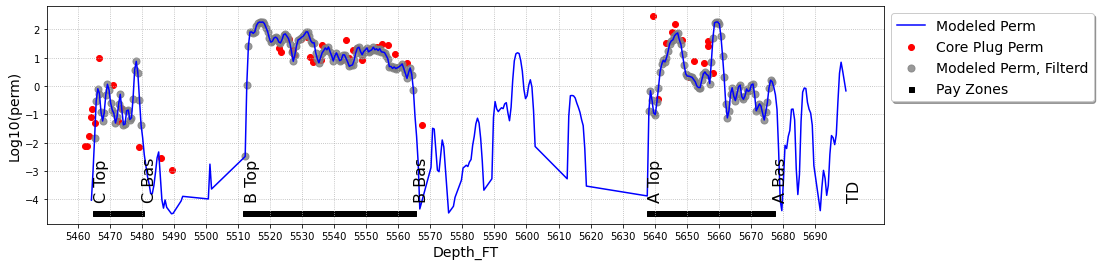

In [55]:
# Examine Filtered Perm Data

# Prepare zone tops for log annotation
zx=zones['Depth_FT'].to_list()                  # Depth Positional Parameter
zy=(zones['Depth_FT']*0-4).to_list()             # Scalor Value
zn=zones['zone_nm'].to_list()                   # Annotation Must be a string

fig=plt.subplots(figsize=(15,4))
plt.scatter(kphi['Depth_FT'], kphi['Ka_log10'], c='red', label='Core Plug Perm')
plt.scatter(df_merged['Depth_FT'], df_merged['log_perm'], c='gray', s=50, alpha=.8, label='Modeled Perm, Filterd')
plt.plot(df_filt['Depth_FT'], df_filt['log_perm'], c='b', label='Modeled Perm')

plt.scatter(df_merged['Depth_FT'], df_merged['log_perm']*0-4.5, c='k', marker='s', s=25, label = 'Pay Zones')
plt.grid(True, linestyle = ':')
plt.xticks(np.arange(5460, 5700, step=10))
plt.ylabel('Log10(perm)', fontsize= 14)
plt.xlabel('Depth_FT', fontsize= 14)
plt.legend(shadow=True, fontsize=14, bbox_to_anchor=(1.0,1.0))
# Zone Tops Annoation 
for i, txt in enumerate(zn):
       plt.annotate(txt, (zx[i], zy[i]), rotation=90, c='k', fontsize=16)

plt.show()
# print(df_merged.head())

### Summarize Kh by Zone

In [47]:
# Calculate varibles needed to determine Kh
df_merged['Ka'] = 10**df_merged['log_perm']  # Convert log_perm back to original values
df_merged['smpl_rate']= .5                   # Wireline log sample rate is 0.5 ft
df_merged['Kh'] = df_merged['Ka']*df_merged['smpl_rate']
df_merged['Kh_cum']=df_merged['Kh'].cumsum()

# Examine df_merged to confirem that depth interval is 0.5 ft
#pd.options.display.max_rows = 999
#print(df_merged)

gb=df_merged.groupby(['zone_nm']).agg({"Kh": ["sum"],
                                       "Ka": ["mean", "min", "max"],
                                "smpl_rate": ["sum"]}).astype(int).reset_index()

# gb.columns = ["_".join(x) for x in gb.columns.ravel()]        # Rename Columns (1st method - useful in large tables)
gb.columns=['Zone', 'Kh','Ka_mean','Ka_min','Ka_max', 'Thk_ft']  # Rename Columns (2nd method - more control of column names)

gb.loc['Column_Total']= gb.sum(numeric_only=True, axis=0)       # Add totals to dataframe

display(gb)
print('Total Kh: ', df_merged['Kh'].sum().astype(int), 'mD-ft')



,Zone,Kh,Ka_mean,Ka_min,Ka_max,Thk_ft
0,A Top,665.0,17.0,0.0,183.0,39.0
1,B Top,1799.0,33.0,0.0,183.0,53.0
2,C Top,10.0,0.0,0.0,7.0,15.0
Column_Total,NaN,2474.0,50.0,0.0,373.0,107.0


Total Kh:  2474 mD-ft
